<a href="https://colab.research.google.com/github/SteMarco07/Progetto-TPSIT-annalisi-dataset/blob/main/ProgettoAnalisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cariamento dataset

Caricamento del dataset json ad una repository presente su GitHub

In [ ]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import folium
response = requests.get("https://raw.githubusercontent.com/SteMarco07/Progetto-TPSIT-annalisi-dataset/refs/heads/main/Dataset/Accidents.json")
data = response.json()
data

---
Funzione per il conteggio degli argomenti per una determinata chiave

In [ ]:
def conteggio(data, chiave):
  argomenti = {}
  for i in data:
    argomento = i[chiave]
    if argomento != "" and argomento != " ":
      if argomento in argomenti:
        argomenti[argomento] += 1
      else:
        argomenti[argomento] = 1
  return argomenti

---
Funzione per la creazione di un sottodizionario ordinato di una dimensione scelta dall'utente

In [ ]:
def ordinaTagliaDizionario (dizionario):
  dizionarioOrdinato = dict(sorted(dizionario.items(), key=lambda item: item[1], reverse=True))
  dim = int(input("Inserisci il numero di parametri: "))
  topDizionarioOrdinato = dict(list(dizionarioOrdinato.items())[:dim])
  return topDizionarioOrdinato


#Analisi sulle quantità di elicotteri ed aerei



---


Funzione per il conteggio dei veivoli presenti nel dataset, gli viene passato come parametro la chiave del veivolo e ne ritorna la quantità

In [ ]:
def contaVeivoli (chiave):
  count = 0
  for i in data:
    if chiave in i.keys() and i[chiave]:
      count += 1
  return count



---


Conteggio del numero di schianti avvenuti in elicottero

In [ ]:
numSchiantiElicottero = contaVeivoli('Helicopter')
print(f"Sono presenti {numSchiantiElicottero} elicotteri")

Sono presenti 1122 elicotteri




---


Conteggio del numero di schianti avvenuti in aereo

In [ ]:
numSchiantiAereo = contaVeivoli('Airplane')
print(f"Sono presenti {numSchiantiAereo} aerei")

Sono presenti 3424 aerei


---
Grafico a torta che rappresenta la percentuale di aerei ed elicotteri

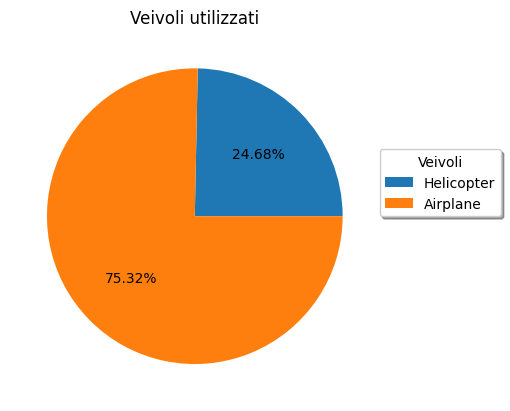

In [ ]:
#Argomenti
labels1 = 'Helicopter', 'Airplane'
#Quantità
sizes1 = [numSchiantiElicottero, numSchiantiAereo]

fig, tortaVeivoli = plt.subplots()
#autopac indica la precisione della prercentuale
tortaVeivoli.pie(sizes1, autopct='%1.2f%%')
tortaVeivoli.set_title('Veivoli utilizzati')

#Legenda del grafico
tortaVeivoli.legend(labels1, loc=(1,0.5),shadow = True, title = 'Veivoli')

plt.show()


#Analisi sui tipi di motori dei veivoli



---


Conteggio delle diverse tipologie di motori

In [ ]:
tipiMotori = {}

for elementi in data:
  motore = elementi['EngineType']
  if motore in tipiMotori:
     tipiMotori[motore] += 1
  else:
    tipiMotori[motore] = 1


for keys,value in tipiMotori.items():
  print(f"{keys}, {value}")


Turboprop, 1332
Jet, 808
Piston, 2406




---


Grafico a torta che rappresenta i tipi motori utilizzati dagli aerei o elicotteri

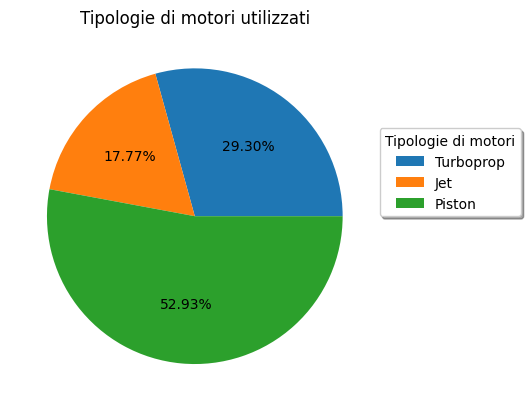

In [ ]:

size2 = list(tipiMotori.values())

fig, tortaMotori = plt.subplots()
tortaMotori.pie(size2, autopct='%1.2f%%')
tortaMotori.set_title('Tipologie di motori utilizzati')
# Aggiungi la legenda
tortaMotori.legend(list(tipiMotori.keys()), loc=(1,0.5),shadow = True, title='Tipologie di motori')

plt.show()

---
Grafico a barre che rappresenta le quantità per i diversi tipi di motori

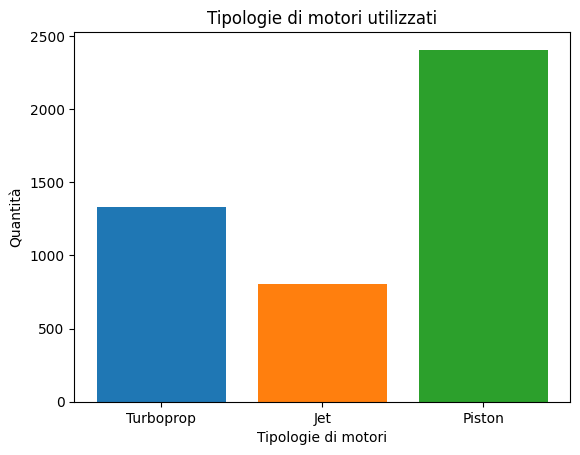

In [ ]:

fig, barreMotori = plt.subplots()

bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

barreMotori.bar(tipiMotori.keys(), size2, color=bar_colors)

barreMotori.set_ylabel('Quantità')
barreMotori.set_xlabel('Tipologie di motori')
barreMotori.set_title('Tipologie di motori utilizzati')

plt.show()

---
Funzione di ricerca che ritorna il valore di una chiave data in un dizionario

In [ ]:
def cercaValoreChiave(data, chiave):
  for i in data.keys():
    if i == chiave:
      return data[chiave]
  return None

#Analisi sui modelli dei veivoli

---
Conteggio dei modelli di aerei o elicotteri

In [ ]:
modelli = conteggio(data,"Model")

modelli

---
Creo un nuovo dizionario ordinato in maniera decrescente dei modelli dei veivoli, successivamente ne crea un altro con solo con i primi, il numero è scelto dall'utente

In [ ]:

topModelli = ordinaTagliaDizionario(modelli)
topModelli

Inserisci il numero di parametri: 12


{'Robinson Helicopter Company R44': 258,
 'Robinson Helicopter Company R22': 214,
 'Bell Bell 206': 186,
 'Piper Aircraft Inc PA-34 Seneca': 184,
 'Beechcraft Corp Baron (Beech 58)': 153,
 'Airbus Helicopters H125 / AS350': 113,
 'Sikorsky (Schweizer) Hughes 269': 113,
 'MD Helicopters Inc MD500 / Hughes 369': 101,
 'Piper Aircraft Inc PA-31 Navajo': 93,
 'Piper Aircraft Inc PA-46 Malibu': 87,
 'Beechcraft Corp King Air 90': 70,
 'CESSNA T41': 60}

---
Grafico che rappresenta la classifica dei modelli presedentemente selezionati

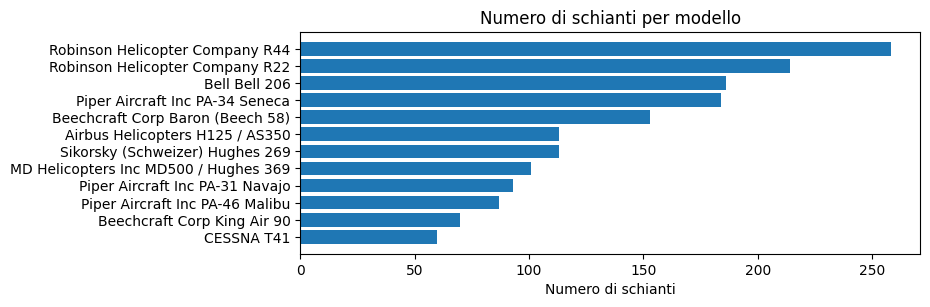

In [ ]:
altezza = (len(topModelli)*12)/50
fig, topModelliBarre = plt.subplots(figsize=(8, altezza))

topModelliChiavi = topModelli.keys()
topModelliValori = topModelli.values()

y_pos = np.arange(len(topModelliChiavi))

topModelliBarre.barh(y_pos, topModelliValori, align='center')
topModelliBarre.set_yticks(y_pos, labels=topModelliChiavi)
topModelliBarre.invert_yaxis()
topModelliBarre.set_xlabel('Numero di schianti')
topModelliBarre.set_title('Numero di schianti per modello')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti con un modello specifico

In [ ]:
modello = input("Inserisci il modello di veivolo che vorresti cercare: ")

ritorno = cercaValoreChiave(modelli,modello)
if ritorno != None:
  print(f"Il modello {modello} è stato coinvolto in {ritorno} schianti")
else:
  print(f"Il modello non è stato trovato")

Inserisci il modello di veivolo che vorresti cercare: 12
Il modello non è stato trovato


#Analisi sulle compagnie

---
Conteggio delle compagnie che hanno avuto dei veivoli coinvolti in schianti

In [ ]:
operatori = conteggio(data, 'Operator')
operatori

{'Servant Air': 3,
 'Alan Robinson': 1,
 'Silver State Helicopters Ltd': 1,
 'California Aviation Services Inc': 4,
 'Northwest Airlines': 1,
 'Corporate American Operator': 34,
 'Robert L Miars': 2,
 'United States United Air Lines Inc.': 9,
 'United States Southwest Airlines Co. (San Antonio, Tx)': 10,
 'United States ': 96,
 'Adkins Aviation LLC': 1,
 'Grant Aviation': 11,
 'William J &amp; Karen D Easterling': 1,
 'Alex Mill Development Corp': 1,
 'JJ Helicopters Inc': 2,
 'Burt Aviation &amp; Transportation LLC': 1,
 'Farm Aviation Inc': 3,
 'Globe Wholesale Inc': 1,
 'ABA Aviation Resources Inc': 1,
 'Qualint LLC': 1,
 'Blue Sky Airways Inc': 1,
 'Naples Air Center Inc': 1,
 'Laughlin Aviation LLC': 1,
 'Private US Operator': 221,
 'Michael John Bybyk': 1,
 'McNeely Charter Service': 6,
 'Metro Aviation Inc (Louisiana)': 6,
 'Parks College of St Louis University': 1,
 'Tropical Helicopters': 1,
 'Universal Aviators Academy Inc': 2,
 'Helicopter Services Inc (Texas)': 2,
 'Gavin A


---
Creo un nuovo dizionario ordinato in maniera decrescente delle compagnie, successivamente ne crea un altro con solo con i primi, il numero è scelto dall'utente

In [ ]:
topOperatori = ordinaTagliaDizionario(operatori)
topOperatori

Inserisci il numero di parametri: 12


{'Private US Operator': 221,
 'United States ': 96,
 'Corporate American Operator': 34,
 'Air Methods Corp': 31,
 'Delta Air Lines': 23,
 'American Airlines': 22,
 'Ameriflight': 20,
 'US Aviation Academy': 19,
 'Air Evac Lifeteam': 17,
 'Other': 17,
 'Southwest Airlines': 15,
 'United States Delta Air Lines, Inc.': 14}

---
Grafico che rappresenta la classifica dei modelli presedentemente selezionati

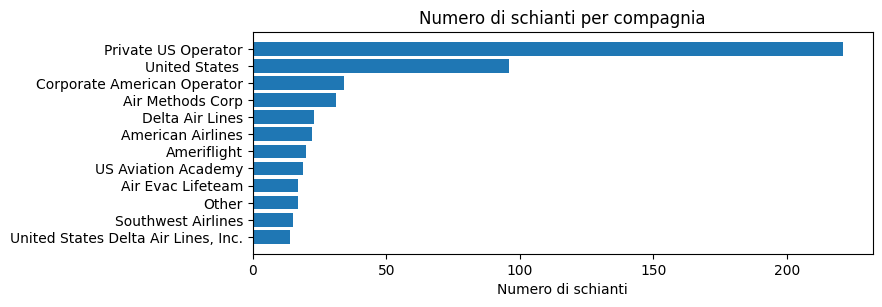

In [ ]:
altezza = (len(topOperatori)*12)/50
fig, topOperatoriBarre = plt.subplots(figsize=(8, altezza))

topOperatoriChiavi = topOperatori.keys()
topOperatoriValori = topOperatori.values()

y_pos = np.arange(len(topOperatoriChiavi))

topOperatoriBarre.barh(y_pos, topOperatoriValori, align='center')
topOperatoriBarre.set_yticks(y_pos, labels=topOperatoriChiavi)
topOperatoriBarre.invert_yaxis()
topOperatoriBarre.set_xlabel('Numero di schianti')
topOperatoriBarre.set_title('Numero di schianti per compagnia')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti a veivoli di una determinata compagnia

In [ ]:
compagnia = input("Inserisci la compagnia di cui vuoi sapere il numero di veivoli coinvolti in schianti: ")

ritorno = cercaValoreChiave(operatori,compagnia)
if ritorno != None:
  print(f"La compagnia {compagnia} ha avuto {ritorno} veivoli coinvolti in schianti")
else:
  print(f"La compagnia non è stata trovata")

Inserisci la compagnia di cui vuoi sapere il numero di veivoli coinvolti in schianti: 12


#Analisi sulle fasi in cui sono avvenutii gli schianti

---
Conteggio delle fasi in cui sono avvenuti degli schianti

In [ ]:
fasi = conteggio(data, 'FlightPhase')
fasi

---
Grafico a torta che rappresenta la percentuale di schianti durante le diverse fasi

In [ ]:
size2 = list(fasi.values())

fig, tortaFasi = plt.subplots()
tortaFasi.pie(size2, autopct='%1.2f%%')
tortaFasi.set_title('Fasi del viaggio con incidenti')
# Aggiungi la legenda
tortaFasi.legend(list(fasi.keys()), loc=(1,0.5),shadow = True, title='Fasi di viaggio')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti a veivoli di una determinata compagnia

In [ ]:
fase = input("Inserisci la fase in cui vuoi sapere il numero di schianti: ")

ritorno = cercaValoreChiave(fasi,fase)
if ritorno != None:
  print(f"Durante la fase {fase} sono avvenuti {ritorno} incidenti")
else:
  print(f"La fase non è stata trovata")

Inserisci la fase in cui vuoi sapere il numero di schianti: Landing
Durante la fase Landing sono avvenuti 1305 incidenti


#Analisi sulla gravità degli incidenti

---
Conteggio delle fasi in cui sono avvenuti degli schianti

In [ ]:
nGravita = conteggio(data, 'InjuryLevel')
nGravita

{'Fatal': 771, 'None': 2977, 'Serious': 439, 'Minor': 160, 'Unknown': 16}

---
Grafico a torta che rappresenta la percentuale di schianti durante le diverse fasi

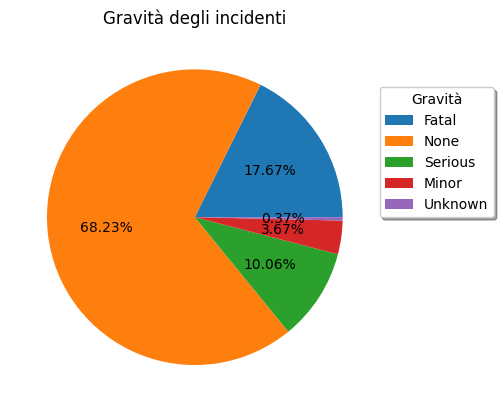

In [ ]:
valori = list(nGravita.values())

fig, tortaGravita = plt.subplots()
tortaGravita.pie(valori, autopct='%1.2f%%')
tortaGravita.set_title('Gravità degli incidenti')
# Aggiungi la legenda
tortaGravita.legend(list(nGravita.keys()), loc=(1,0.5),shadow = True, title='Gravità')

plt.show()

---
Ricerca di quanti incidenti sono avvenuti in una fase

In [ ]:
gravita = input("Inserisci la fase in cui vuoi sapere il numero di schianti: ")

ritorno = cercaValoreChiave(nGravita,gravita)
if ritorno != None:
  print(f"Il numero di incidenti con gravità {gravita} sono {ritorno}")
else:
  print(f"La gravita non è stata trovata")

KeyboardInterrupt: Interrupted by user

#Analisi riguardante gli anni in cui sono avvenuti incidenti (dal 2008 al 2020)

In [ ]:
anni = conteggio(data, 'Year')
anni

---
Grafico che rappresenta la classifica dei modelli presedentemente selezionati

In [ ]:

fig, anniBarre = plt.subplots(figsize=(8, altezza))

anniChiavi = anni.keys()
anniValori = anni.values()

anniBarre.bar(anniChiavi, anniValori)

anniBarre.set_ylabel('Incidenti')
anniBarre.set_title('Anni')

plt.show()

---
Ricerca quanti incidenti sono avvenuti in un determinato anno

In [ ]:
anno = int(input("Inserisci l'anno in cui vuoi visualizzare quanti veivoli sono stati coinvolti coinvolti in schianti (dal 2008 al 2020): "))

ritorno = cercaValoreChiave(anni,anno)
if ritorno != None:
  print(f"Durante l'anno {anno} sono avvenuti {ritorno} incidenti")
else:
  print(f"L'anno non è stata trovata")

#Analisi sui loughi di **schianto**

---
Funzione che passato il nome di una città ritorna le coordinate se trovate

In [ ]:
from geopy.geocoders import Nominatim

def get_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_coordinates_app")
    location = geolocator.geocode(city_name)

    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Esempio di utilizzo:
city_name = input("Inserisci il nome della città: ")
coordinates = get_coordinates(city_name)

if coordinates:
    print(f"Le coordinate di {city_name} sono: Latitudine = {coordinates[0]}, Longitudine = {coordinates[1]}")
else:
    print(f"Impossibile trovare le coordinate per la città {city_name}.")


Inserisci il nome della città: Brescia
Le coordinate di Brescia sono: Latitudine = 45.77958045, Longitudine = 10.4258729694612


---
Crea una lista contenente i nomi delle città, rimuovendo le opzioni non valide

In [ ]:
import re

def validate_string(s):
    words = s.split()

    # Verifica se la stringa contiene numeri
    if re.search(r'\d', s):
        return False

    # Verifica se la stringa contiene determinate parole
    if "airport" in words and "near" in words and "Airport" in words and "Near" in words :
        return False

    return True

citta = []
for i in data:
 argomento = i["Location"]
 if argomento != "" and argomento != " " and validate_string(argomento):
  citta.append(argomento)

citta = list(set(citta))
ptint(print(len(citta)))
citta





1287


---
Conteggio del numero degli incidenti per ogni città

In [ ]:
incidentiPerCitta = conteggio(data,"Location")
incidentiPerCitta

---
Crea la mappa dei luoghi degli incidenti avvenuti principalmente negli Stati Uniti d'America, indicando il luogo, numero di incidenti, indicato anche visivamente

In [ ]:

coordinate = []
for city in citta:
    coord = get_coordinates(city)
    print(len(coordinate))
    if coord != None:
      dato = {}
      dato["citta"] = city
      dato["coordinate"] = coord
      dato["incidenti"] = incidentiPerCitta[city]
      print(dato)
      coordinate.append(dato)

coordinate


0
0
{'citta': ' Burnet Municipal Kate Craddock Field, TX', 'coordinate': (30.7399655, -98.23711363540754), 'incidenti': 1}
1
{'citta': 'Nielsville', 'coordinate': (47.5273275, -96.8164302), 'incidenti': 1}
2
{'citta': 'Columbiaville', 'coordinate': (43.156693, -83.410505), 'incidenti': 1}
3
{'citta': 'Connersville', 'coordinate': (39.6411589, -85.1410748), 'incidenti': 1}
4
{'citta': 'Galveston', 'coordinate': (29.3872254, -94.992736), 'incidenti': 2}
5
{'citta': 'Charlotte Amalie', 'coordinate': (18.3414575, -64.9335173), 'incidenti': 1}
6
6
{'citta': 'Cheltenham', 'coordinate': (51.8995685, -2.0711559), 'incidenti': 1}
7
{'citta': 'Corvallis', 'coordinate': (44.5645659, -123.2620435), 'incidenti': 2}
8
8
{'citta': 'Culpeper', 'coordinate': (38.4912207, -77.9618216), 'incidenti': 1}
9
{'citta': 'Roseville', 'coordinate': (38.7521235, -121.2880059), 'incidenti': 1}
10
10
10
10
{'citta': 'Bryce Canyon', 'coordinate': (37.61840685483066, -112.14217871677518), 'incidenti': 1}
11
{'citta':

25
{'citta': 'LOUISA, VA', 'coordinate': (37.9854441, -77.9486307), 'incidenti': 1}
26
{'citta': 'Koosharem', 'coordinate': (38.5102559, -111.881301), 'incidenti': 1}
27
27
{'citta': 'Bismarck', 'coordinate': (46.808327, -100.783739), 'incidenti': 2}
28
28
{'citta': 'Clyde', 'coordinate': (32.4059605, -99.4936912), 'incidenti': 1}


29
29
{'citta': 'Gila Bend', 'coordinate': (32.9478267, -112.716823), 'incidenti': 1}
30
{'citta': 'Yakutat', 'coordinate': (59.5520005, -139.7325742), 'incidenti': 1}
31
{'citta': 'Thomaston', 'coordinate': (40.7862124, -73.7137421), 'incidenti': 2}
32
32
{'citta': 'Sierra Blanca', 'coordinate': (31.1778312, -105.357627), 'incidenti': 1}
33
{'citta': 'Ashland', 'coordinate': (40.7887367, -82.2360391), 'incidenti': 2}
34
{'citta': 'Oakland Park', 'coordinate': (37.5106902, -75.8213191), 'incidenti': 1}
35
{'citta': ' Baldwin Airport, WI', 'coordinate': (44.9652282, -92.3908778), 'incidenti': 1}
36
{'citta': 'Springfield, MO', 'coordinate': (37.2081729, -93.2922715), 'incidenti': 1}
37
{'citta': 'Laramie', 'coordinate': (41.3116442, -105.5917876), 'incidenti': 1}
38
{'citta': 'Eliza Island', 'coordinate': (48.65246500000001, -122.58486349664241), 'incidenti': 1}
39
{'citta': 'Sanford', 'coordinate': (35.4798757, -79.1802994), 'incidenti': 1}
40
40
{'citta': 'Lytle Creek', 'coordinate': 

48
48
{'citta': 'Pasco', 'coordinate': (28.2996183, -82.4522702), 'incidenti': 1}
49
{'citta': 'North Fayston', 'coordinate': (44.2420023, -72.8381728), 'incidenti': 1}
50
{'citta': 'Henderson', 'coordinate': (32.182598, -95.7893178), 'incidenti': 2}
51
{'citta': 'Waitsburg', 'coordinate': (46.2704176, -118.153286), 'incidenti': 1}
52
{'citta': 'Potsdam', 'coordinate': (52.4009309, 13.0591397), 'incidenti': 1}
53
{'citta': 'White Bear Lake', 'coordinate': (45.0838098, -93.0069304), 'incidenti': 2}
54
{'citta': 'Kingman', 'coordinate': (6.40046275, -162.46263721464027), 'incidenti': 1}
55
{'citta': 'Vega Baja', 'coordinate': (18.41776575, -66.39944742043909), 'incidenti': 1}
56
{'citta': 'New York La Guardia Airport', 'coordinate': (40.7757145, -73.87336398511545), 'incidenti': 1}
57
{'citta': 'De Witt , Arkansas', 'coordinate': (34.2928774, -91.3378987), 'incidenti': 1}
58
{'citta': 'Torrance', 'coordinate': (33.8371392, -118.3413606), 'incidenti': 2}
59
{'citta': 'Bolivar', 'coordinat

337
337
{'citta': 'Baton Rouge , Louisiana', 'coordinate': (30.4494155, -91.1869659), 'incidenti': 1}
338
{'citta': 'Hudson', 'coordinate': (40.7381635, -74.0550731), 'incidenti': 1}
339
339
{'citta': 'Birmingham', 'coordinate': (52.4796992, -1.9026911), 'incidenti': 3}
340
{'citta': 'Oxford', 'coordinate': (51.7520131, -1.2578499), 'incidenti': 1}
341
341
341
{'citta': 'Three Forks', 'coordinate': (45.892606, -111.551448), 'incidenti': 1}
342
342
{'citta': 'Fairhope', 'coordinate': (30.5231647, -87.9028458), 'incidenti': 1}
343
{'citta': 'Fullerton', 'coordinate': (33.8708215, -117.929416), 'incidenti': 2}
344
{'citta': 'Markleeville', 'coordinate': (38.6671855, -119.83128225726742), 'incidenti': 1}
345
{'citta': 'Buckhead', 'coordinate': (33.8398137, -84.3795589), 'incidenti': 1}
346
{'citta': 'Madison', 'coordinate': (43.074761, -89.3837613), 'incidenti': 6}
347
{'citta': 'Burnsville , North Carolina', 'coordinate': (35.9172243, -82.2996695), 'incidenti': 1}
348
{'citta': 'Byron', '

471
{'citta': 'Bedford, Massachusetts', 'coordinate': (42.4917301, -71.2817947), 'incidenti': 1}
472
{'citta': 'Atlanta', 'coordinate': (33.7489924, -84.3902644), 'incidenti': 5}
473
{'citta': 'Bogalusa', 'coordinate': (30.7910204, -89.8486858), 'incidenti': 1}
474
{'citta': 'Spring Branch', 'coordinate': (29.8899389, -98.4252957), 'incidenti': 1}
475
{'citta': 'Houston Intercontinental Ap', 'coordinate': (29.936736721313164, -95.35600531141291), 'incidenti': 1}
476
{'citta': 'Ambia , Indiana', 'coordinate': (40.4900363, -87.5169642), 'incidenti': 1}
477
{'citta': 'Seymour', 'coordinate': (33.5942438, -99.2603073), 'incidenti': 1}
478
{'citta': 'Hamilton Montana', 'coordinate': (46.2472045, -114.1555462), 'incidenti': 1}
479
{'citta': 'Temple Bar', 'coordinate': (53.34525515, -6.264126142539659), 'incidenti': 1}
480
{'citta': 'Bay City', 'coordinate': (43.5944677, -83.8888648), 'incidenti': 1}
481
{'citta': 'Fort Lauderdale', 'coordinate': (26.1223084, -80.1433786), 'incidenti': 4}
482

680
{'citta': 'Charlotte Airport', 'coordinate': (35.21074145, -80.9457435226013), 'incidenti': 1}
681
681
{'citta': 'Alameda', 'coordinate': (37.6090291, -121.899142), 'incidenti': 1}
682
{'citta': 'Toms River', 'coordinate': (39.9526791, -74.1968257), 'incidenti': 1}
683
683
{'citta': 'Palo Alto', 'coordinate': (37.4443293, -122.1598465), 'incidenti': 1}
684
{'citta': 'Whitehall', 'coordinate': (51.50306465716084, -0.12599991542912503), 'incidenti': 1}
685
{'citta': 'Butte', 'coordinate': (39.6519275, -121.5858444), 'incidenti': 1}
686
686
{'citta': 'Greer', 'coordinate': (34.9326334, -99.5435856), 'incidenti': 1}
687
{'citta': 'Slaton', 'coordinate': (33.4343676, -101.643524), 'incidenti': 1}
688
688
{'citta': 'Covington , Kentucky', 'coordinate': (39.0831712, -84.5107548), 'incidenti': 1}
689
{'citta': 'South St. Paul', 'coordinate': (44.8906694, -93.0372808), 'incidenti': 1}
690
{'citta': 'Parkersburg', 'coordinate': (39.2667309, -81.5620755), 'incidenti': 2}
691
{'citta': 'New Ca

1050
{'citta': 'Bridgewater, VA', 'coordinate': (38.3820655, -78.9766975), 'incidenti': 1}
1051
{'citta': 'Badami Airport', 'coordinate': (70.1374955, -147.0303414506631), 'incidenti': 1}
1052
1052
{'citta': 'Grand Junction', 'coordinate': (39.0672568, -108.56448), 'incidenti': 1}
1053
{'citta': 'Iowa City', 'coordinate': (41.6612561, -91.5299106), 'incidenti': 1}
1054
{'citta': 'Teterboro', 'coordinate': (40.8598219, -74.0593075), 'incidenti': 1}
1055
1055
1055
{'citta': 'Stockton', 'coordinate': (37.9577016, -121.290779), 'incidenti': 2}
1056
{'citta': 'Nondalton', 'coordinate': (59.9736111, -154.845833), 'incidenti': 1}
1057
1057
1057
{'citta': 'Stow', 'coordinate': (42.4365949, -71.5050009), 'incidenti': 1}
1058
{'citta': 'Ormond Beach', 'coordinate': (29.2854132, -81.0557921), 'incidenti': 1}
1059
{'citta': 'Romeoville', 'coordinate': (41.6475306, -88.0895061), 'incidenti': 1}
1060
{'citta': 'Elk Creek', 'coordinate': (39.6051574, -122.5391598), 'incidenti': 1}
1061
{'citta': 'Kru

[{'citta': ' Burnet Municipal Kate Craddock Field, TX',
  'coordinate': (30.7399655, -98.23711363540754),
  'incidenti': 1},
 {'citta': 'Nielsville',
  'coordinate': (47.5273275, -96.8164302),
  'incidenti': 1},
 {'citta': 'Columbiaville',
  'coordinate': (43.156693, -83.410505),
  'incidenti': 1},
 {'citta': 'Connersville',
  'coordinate': (39.6411589, -85.1410748),
  'incidenti': 1},
 {'citta': 'Galveston',
  'coordinate': (29.3872254, -94.992736),
  'incidenti': 2},
 {'citta': 'Charlotte Amalie',
  'coordinate': (18.3414575, -64.9335173),
  'incidenti': 1},
 {'citta': 'Cheltenham',
  'coordinate': (51.8995685, -2.0711559),
  'incidenti': 1},
 {'citta': 'Corvallis',
  'coordinate': (44.5645659, -123.2620435),
  'incidenti': 2},
 {'citta': 'Culpeper',
  'coordinate': (38.4912207, -77.9618216),
  'incidenti': 1},
 {'citta': 'Roseville',
  'coordinate': (38.7521235, -121.2880059),
  'incidenti': 1},
 {'citta': 'Bryce Canyon',
  'coordinate': (37.61840685483066, -112.14217871677518),
  '

In [ ]:
def getColore (valore):
  if valore == 1:
    return "blue"
  elif valore < 3:
    return "green"
  elif valore  < 5:
    return "orange"
  elif valore >= 5:
    return "red"


mappa = folium.Map(location=[39.8283, -98.5795], zoom_start=5)

blue_group = folium.FeatureGroup(name="Blue (valore = 1)").add_to(mappa)
green_group = folium.FeatureGroup(name="Green (valore < 3)").add_to(mappa)
orange_group = folium.FeatureGroup(name="Orange (valore < 5)").add_to(mappa)
red_group = folium.FeatureGroup(name="Red (valore >= 5)").add_to(mappa)

# Aggiungi marker ai gruppi
for coord in coordinate:
    color = getColore(coord["incidenti"])
    popup_text = coord["citta"] + " - Numero di incidenti: " + str(coord["incidenti"])

    if color == "blue":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(blue_group)
    elif color == "green":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(green_group)
    elif color == "orange":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(orange_group)
    elif color == "red":
        folium.Marker(
            location=coord["coordinate"],
            icon=folium.Icon(color=color),
            popup=popup_text
        ).add_to(red_group)

# Aggiungi LayerControl alla mappa
folium.LayerControl().add_to(mappa)

mappa.save("mappa.html")
mappa